## Part 5 - Three dimensions

So far we've looked at two dimensional arrays and images. However, the real world has three dimensions, and often we want to create models that are three dimensional, or view capture and manipulate three dimensional images.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from dtoolbioimage import ImageDataSet, Image, Image3D
import ipyvolume as ipv
import numpy as np

Let's start by loading a three dimensional image data set.

In [3]:
ids = ImageDataSet('https://jicscratch.blob.core.windows.net/8af28dcb-6892-4d2e-86d7-f0ea2f100761')

Because image data sets often contain multiple images, series and channels, we'll select a particular image and channel:

In [4]:
stack = ids.get_stack('Hypocotyl3', 'Hypocotyl3 #1', 1)

We can see that this is a three dimensional matrix:

In [5]:
stack.shape

(512, 512, 113)

In [35]:
def zoom_to_match_scales(stack):
    from scipy.ndimage import zoom
    px = float(stack.metadata.PhysicalSizeX)
    pz = float(stack.metadata.PhysicalSizeZ)
    ratio = pz / px
    zoomed = zoom(stack, (1, 1, ratio))
    
    zoomed_image = zoomed.view(Image3D)
    zoomed_image.metadata = stack.metadata
    
    return zoomed_image

In [36]:
zoomed = zoom_to_match_scales(stack)

In [37]:
zoomed.shape

(512, 512, 171)

In [40]:
def autopad(stack):
    xdim, ydim, zdim = stack.shape
    assert(xdim == ydim)
    
    n_pad_before = (xdim - zdim) // 2
    n_pad_after = xdim - (n_pad_before + zdim)

    zeros = np.zeros((xdim, ydim), dtype=np.uint8)
    pad_before = np.dstack([zeros] * n_pad_before)
    pad_after = np.dstack([zeros] * n_pad_after)

    return np.dstack((pad_before, stack, pad_after))

In [41]:
padded = autopad(zoomed)

In [42]:
padded.shape

(512, 512, 512)

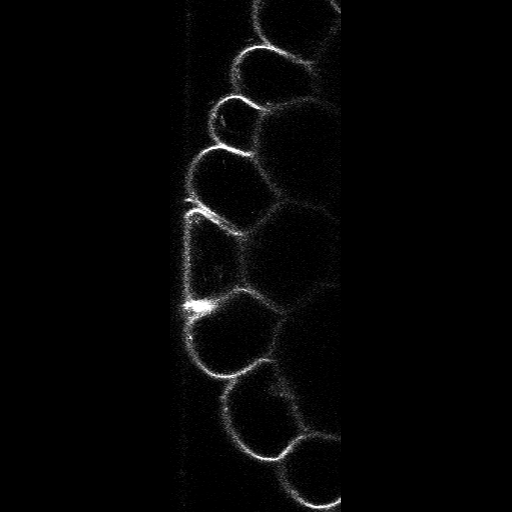

In [50]:
padded[:,256,:].view(Image)

In [43]:
ipv.quickvolshow(padded, level=[0.13, 0.26, 0.9], opacity=[0, 0.07, 0.12], lighting=True)

/Users/mhartley/projects/usebioimage/venv/lib/python3.6/site-packages/ipyvolume/widgets.py:179: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data_view = self.data_original[view]
/Users/mhartley/projects/usebioimage/venv/lib/python3.6/site-packages/ipyvolume/utils.py:204: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data = (data[slices1] + data[slices2])/2
/Users/mhartley/projects/usebioimage/venv/lib/python3.6/site-packages/ipyvolume/serialize.py:81: RuntimeWarning: invalid value encountered in true_divide
  gradient = gradient / np.sqr

In [44]:
ipv.style.use('dark')